## Practice Question Figure

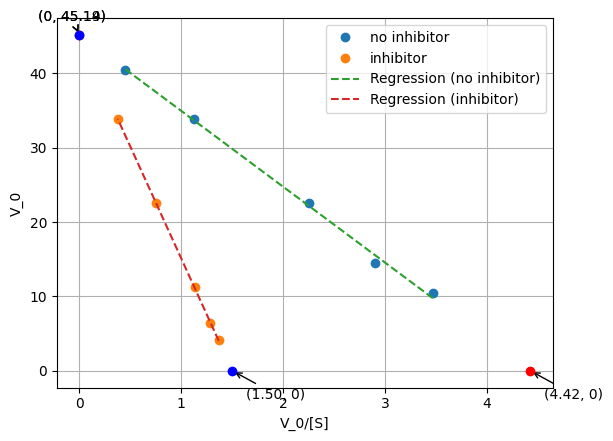

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
s = np.array([3, 5, 10, 30, 90])
v_0 = np.array([10.4, 14.5, 22.5, 33.8, 40.5])
v_0_i = np.array([4.1, 6.4, 11.3, 22.6, 33.8])

# Calculate V_0 / [S] for both cases
v_s_without = v_0 / s
v_s_with = v_0_i / s

# Perform linear regression to fit a line
slope_without, intercept_without = np.polyfit(v_s_without, v_0, 1)
slope_with, intercept_with = np.polyfit(v_s_with, v_0_i, 1)

# Calculate intersection points with x-axis and y-axis
x_intercept_without = -intercept_without / slope_without
y_intercept_without = intercept_without
x_intercept_with = -intercept_with / slope_with
y_intercept_with = intercept_with

# Plot data points
plt.plot(v_s_without, v_0, marker='o', linestyle='', label='no inhibitor')
plt.plot(v_s_with, v_0_i, marker='o', linestyle='', label='inhibitor')

# Plot regression lines
plt.plot(v_s_without, slope_without * v_s_without + intercept_without, linestyle='--', label='Regression (no inhibitor)')
plt.plot(v_s_with, slope_with * v_s_with + intercept_with, linestyle='--', label='Regression (inhibitor)')

# Plot intersection points with x-axis and y-axis
plt.scatter(x_intercept_without, 0, color='red', zorder=5)
plt.scatter(0, y_intercept_without, color='red', zorder=5)
plt.scatter(x_intercept_with, 0, color='blue', zorder=5)
plt.scatter(0, y_intercept_with, color='blue', zorder=5)

plt.annotate(f'({x_intercept_without:.2f}, 0)', (x_intercept_without, 0), xytext=(10, -20),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.annotate(f'(0, {y_intercept_without:.2f})', (0, y_intercept_without), xytext=(-30, 10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.annotate(f'({x_intercept_with:.2f}, 0)', (x_intercept_with, 0), xytext=(10, -20),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.annotate(f'(0, {y_intercept_with:.2f})', (0, y_intercept_with), xytext=(-30, 10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))


# Add labels and title
plt.xlabel('V_0/[S]')
plt.ylabel('V_0')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


## $OD_{420}$ Against the Concentration of ONP

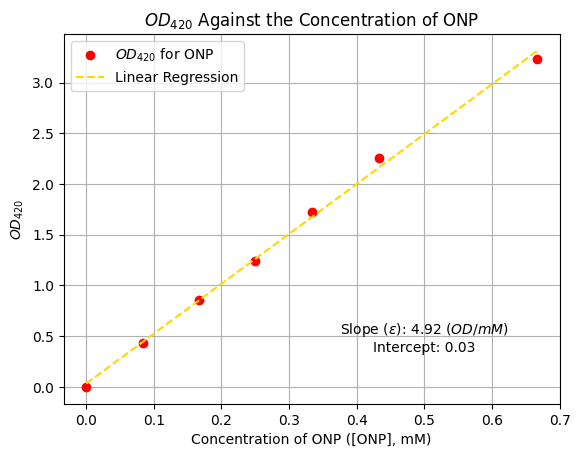

In [2]:
import numpy as np
import matplotlib.pyplot as plt

total_v = 3.0

V_S = np.array([0, 0.25, 0.5, 0.75, 1.0, 1.3, 2.0])

C_S = (1 * V_S) / total_v

OD = np.array([0, 0.428, 0.856, 1.24, 1.723, 2.256, 3.236])

# Perform linear regression to fit a line
slope, intercept = np.polyfit(C_S, OD, 1)

# Calculate intersection points with x-axis and y-axis
x_intercept = -intercept / slope
y_intercept = intercept

# Plot data points
plt.plot(C_S, OD, marker='o', linestyle='', color='red', label='$OD_{420}$ for ONP')

# Plot regression lines
plt.plot(C_S, slope * C_S + intercept, linestyle='--', color='gold', label='Linear Regression')

# # Plot intersection points with x-axis and y-axis
# plt.scatter(x_intercept, 0, color='red', zorder=5)
# plt.scatter(0, y_intercept, color='red', zorder=5)

# plt.annotate(f'({x_intercept:.2f}, 0)', (x_intercept, 0), xytext=(10, -20),
#              textcoords='offset points', arrowprops=dict(arrowstyle="->"))
# plt.annotate(f'(0, {y_intercept:.2f})', (0, y_intercept), xytext=(-30, 10),
#              textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.text(0.5, 0.52, f'Slope ($\epsilon$): {slope:.2f} ($OD/mM$)', fontsize=10, ha='center')
plt.text(0.5, 0.35, f'Intercept: {intercept:.2f}', fontsize=10, ha='center')

# Add labels and title
plt.title('$OD_{420}$ Against the Concentration of ONP')
plt.xlabel('Concentration of ONP ([ONP], mM)')
plt.ylabel('$OD_{420}$')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [3]:
slope

4.91794977996376

## ODs against wavelengths (nm)

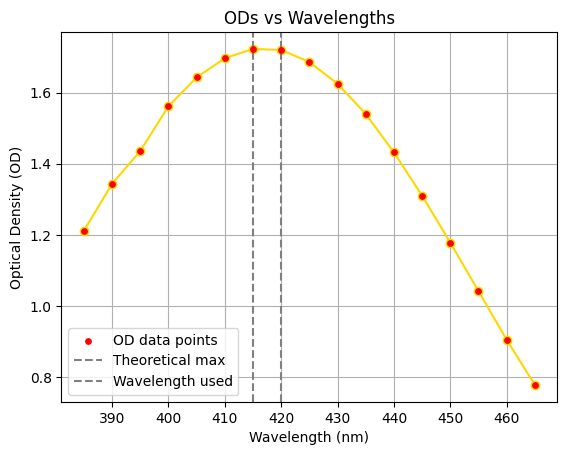

In [4]:
values = np.arange(385, 470, 5)
len(values)

wavelengths = np.array(values)

ODs = np.array([1.212, 1.344, 1.436, 1.562, 1.643, 1.697, 1.723, 1.72, 1.686, 1.625, 1.54, 1.432, 1.31, 1.178, 1.042, 0.905, 0.778])

plt.plot(wavelengths, ODs, marker='o', linestyle='-', color='gold')
plt.scatter(wavelengths, ODs, s=15, color='red', label='OD data points', zorder=5)

max_index = np.argmax(ODs)
plt.axvline(x=415, color='grey', linestyle='--', label=f'Theoretical max')
plt.axvline(x=420, color='grey', linestyle='--', label=f'Wavelength used')


plt.xlabel('Wavelength (nm)')
plt.ylabel('Optical Density (OD)')
plt.title('ODs vs Wavelengths')
plt.legend(loc='lower left')
plt.grid(True)

# Show plot
plt.show()

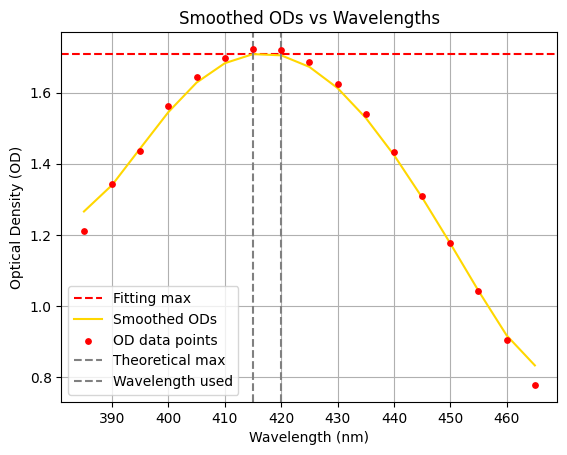

In [5]:
from scipy.ndimage import gaussian_filter1d

# Generate wavelengths array
values = np.arange(385, 470, 5)
wavelengths = np.array(values)

# Example OD data
ODs = np.array([1.212, 1.344, 1.436, 1.562, 1.643, 1.697, 1.723, 1.72, 1.686, 1.625, 1.54, 1.432, 1.31, 1.178, 1.042, 0.905, 0.778])

# Smooth the line using Gaussian filter
smoothed_ODs = gaussian_filter1d(ODs, sigma=1)
max_smooth = max(smoothed_ODs)
plt.axhline(y=max_smooth, color='red', linestyle='--', label=f'Fitting max')

# Plot smoothed data
plt.plot(wavelengths, smoothed_ODs, linestyle='-', color='gold', label='Smoothed ODs')
plt.scatter(wavelengths, ODs, s=15, color='red', label='OD data points', zorder=5)

# Find index of maximum value
max_index = np.argmax(smoothed_ODs)

# Draw vertical dashed line at max value
plt.axvline(x=415, color='grey', linestyle='--', label=f'Theoretical max')
plt.axvline(x=420, color='grey', linestyle='--', label=f'Wavelength used')

# Add labels and title
plt.xlabel('Wavelength (nm)')
plt.ylabel('Optical Density (OD)')
plt.title('Smoothed ODs vs Wavelengths')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

## ODs against Time Intervals (Enzyme Concentration Varies)

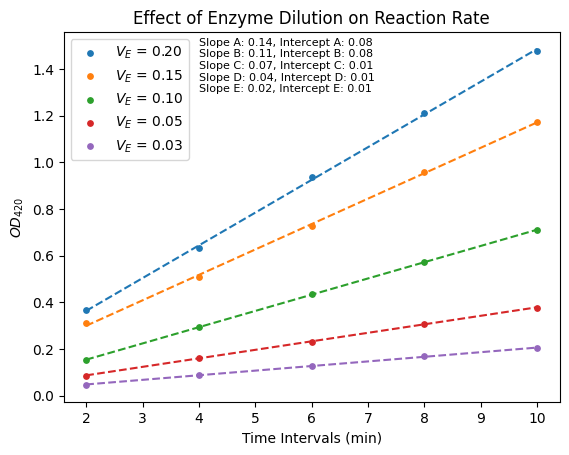

In [6]:
Time_intervals = np.array([2, 4, 6, 8, 10])

Tube_A = np.array([0.365, 0.632, 0.935, 1.213, 1.477])
Tube_B = np.array([0.310, 0.507, 0.727, 0.959, 1.173])
Tube_C = np.array([0.152, 0.294, 0.436, 0.572, 0.709])
Tube_D = np.array([0.086, 0.161, 0.232, 0.308, 0.377])
Tube_E = np.array([0.046, 0.089, 0.128, 0.168, 0.204])

slope_A, intercept_A = np.polyfit(Time_intervals, Tube_A, 1)
slope_B, intercept_B = np.polyfit(Time_intervals, Tube_B, 1)
slope_C, intercept_C = np.polyfit(Time_intervals, Tube_C, 1)
slope_D, intercept_D = np.polyfit(Time_intervals, Tube_D, 1)
slope_E, intercept_E = np.polyfit(Time_intervals, Tube_E, 1)

plt.scatter(Time_intervals, Tube_A, s=15, label='$V_E$ = 0.20', zorder=5)
plt.scatter(Time_intervals, Tube_B, s=15, label='$V_E$ = 0.15', zorder=5)
plt.scatter(Time_intervals, Tube_C, s=15, label='$V_E$ = 0.10', zorder=5)
plt.scatter(Time_intervals, Tube_D, s=15, label='$V_E$ = 0.05', zorder=5)
plt.scatter(Time_intervals, Tube_E, s=15, label='$V_E$ = 0.03', zorder=5)

plt.plot(Time_intervals, slope_A * Time_intervals + intercept_A, linestyle='--')
plt.plot(Time_intervals, slope_B * Time_intervals + intercept_B, linestyle='--')
plt.plot(Time_intervals, slope_C * Time_intervals + intercept_C, linestyle='--')
plt.plot(Time_intervals, slope_D * Time_intervals + intercept_D, linestyle='--')
plt.plot(Time_intervals, slope_E * Time_intervals + intercept_E, linestyle='--')

plt.text(4, 1.50, f'Slope A: {slope_A:.2f}, Intercept A: {intercept_A:.2f}', fontsize=8, ha='left')
plt.text(4, 1.45, f'Slope B: {slope_B:.2f}, Intercept B: {intercept_B:.2f}', fontsize=8, ha='left')
plt.text(4, 1.40, f'Slope C: {slope_C:.2f}, Intercept C: {intercept_C:.2f}', fontsize=8, ha='left')
plt.text(4, 1.35, f'Slope D: {slope_D:.2f}, Intercept D: {intercept_D:.2f}', fontsize=8, ha='left')
plt.text(4, 1.30, f'Slope E: {slope_E:.2f}, Intercept E: {intercept_E:.2f}', fontsize=8, ha='left')

plt.legend()
plt.xlabel('Time Intervals (min)')
plt.ylabel('$OD_{420}$')
plt.title('Effect of Enzyme Dilution on Reaction Rate')

plt.show()


In [7]:
print(slope_A, slope_B, slope_C, slope_D, slope_E)

0.14024999999999999 0.10889999999999998 0.0696 0.03645 0.019749999999999997


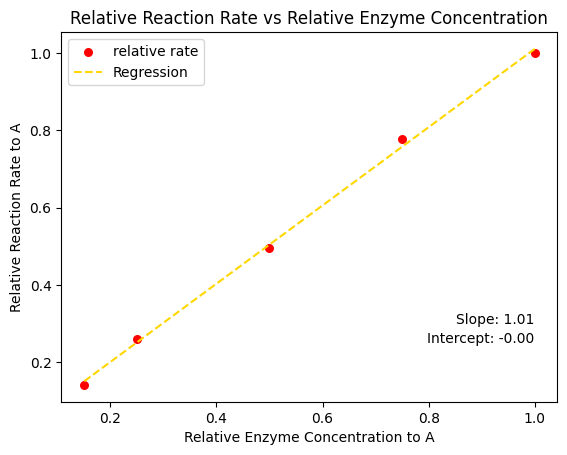

In [8]:
denomianator_rate = slope_A
denomianator_c = 0.20 / 12.0

c_list = np.array([0.20, 0.15, 0.10, 0.05, 0.03]) / 12.0

rate_list = np.array([slope_A, slope_B, slope_C, slope_D, slope_E])

relative_C = c_list / denomianator_c
relative_rate = rate_list / denomianator_rate

slope_re, intercept_re = np.polyfit(relative_C, relative_rate, 1)

plt.scatter(relative_C, relative_rate, color='red',s=30, label='relative rate')
plt.plot(relative_C, slope_re * relative_C + intercept_re, color='gold', linestyle='--', label='Regression')

plt.text(1.0, 0.30, f'Slope: {slope_re:.2f}', fontsize=10, ha='right')
plt.text(1.0, 0.25, f'Intercept: {intercept_re:.2f}', fontsize=10, ha='right')

plt.legend()

plt.xlabel('Relative Enzyme Concentration to A')
plt.ylabel('Relative Reaction Rate to A')
plt.title('Relative Reaction Rate vs Relative Enzyme Concentration')
plt.show()


In [13]:
relative_C

array([1.  , 0.75, 0.5 , 0.25, 0.15])

In [11]:
relative_rate

array([1.        , 0.77647059, 0.49625668, 0.25989305, 0.14081996])

In [9]:
intercept_re

-0.0024655335119479894

In [10]:
slope_re

1.0134973406659358

## Effect of Substrate Concentration on Reaction Velocity without IPTG

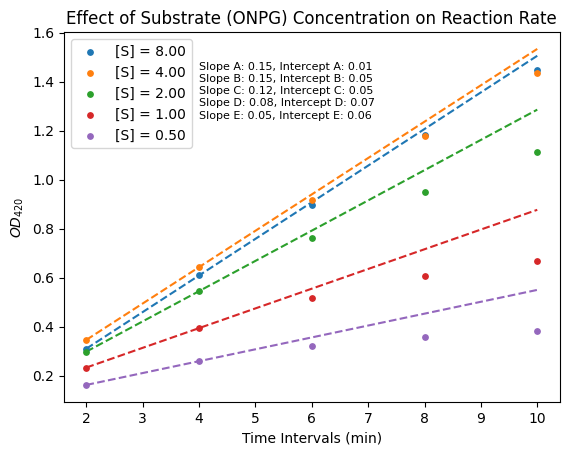

In [14]:
import numpy as np
import matplotlib.pyplot as plt

Time_intervals = np.array([2, 4, 6, 8, 10])

Tube_A = np.array([0.310, 0.609, 0.895, 1.184, 1.449])
Tube_B = np.array([0.346, 0.643, 0.916, 1.177, 1.435])
Tube_C = np.array([0.298, 0.545, 0.760, 0.950, 1.112])
Tube_D = np.array([0.233, 0.394, 0.516, 0.605, 0.667])
Tube_E = np.array([0.162, 0.259, 0.321, 0.358, 0.383])

slope_A, intercept_A = np.polyfit(Time_intervals[:2], Tube_A[:2], 1)
slope_B, intercept_B = np.polyfit(Time_intervals[:2], Tube_B[:2], 1)
slope_C, intercept_C = np.polyfit(Time_intervals[:2], Tube_C[:2], 1)
slope_D, intercept_D = np.polyfit(Time_intervals[:2], Tube_D[:2], 1)
slope_E, intercept_E = np.polyfit(Time_intervals[:2], Tube_E[:2], 1)

plt.scatter(Time_intervals, Tube_A, s=15, label='[S] = 8.00', zorder=5)
plt.scatter(Time_intervals, Tube_B, s=15, label='[S] = 4.00', zorder=5)
plt.scatter(Time_intervals, Tube_C, s=15, label='[S] = 2.00', zorder=5)
plt.scatter(Time_intervals, Tube_D, s=15, label='[S] = 1.00', zorder=5)
plt.scatter(Time_intervals, Tube_E, s=15, label='[S] = 0.50', zorder=5)

plt.plot(Time_intervals, slope_A * Time_intervals + intercept_A, linestyle='--')
plt.plot(Time_intervals, slope_B * Time_intervals + intercept_B, linestyle='--')
plt.plot(Time_intervals, slope_C * Time_intervals + intercept_C, linestyle='--')
plt.plot(Time_intervals, slope_D * Time_intervals + intercept_D, linestyle='--')
plt.plot(Time_intervals, slope_E * Time_intervals + intercept_E, linestyle='--')

plt.text(4, 1.45, f'Slope A: {slope_A:.2f}, Intercept A: {intercept_A:.2f}', fontsize=8, ha='left')
plt.text(4, 1.40, f'Slope B: {slope_B:.2f}, Intercept B: {intercept_B:.2f}', fontsize=8, ha='left')
plt.text(4, 1.35, f'Slope C: {slope_C:.2f}, Intercept C: {intercept_C:.2f}', fontsize=8, ha='left')
plt.text(4, 1.30, f'Slope D: {slope_D:.2f}, Intercept D: {intercept_D:.2f}', fontsize=8, ha='left')
plt.text(4, 1.25, f'Slope E: {slope_E:.2f}, Intercept E: {intercept_E:.2f}', fontsize=8, ha='left')

plt.legend()
plt.xlabel('Time Intervals (min)')
plt.ylabel('$OD_{420}$')
plt.title('Effect of Substrate (ONPG) Concentration on Reaction Rate')

plt.show()


## Effect of Substrate Concentration on Reaction Velocity with IPTG

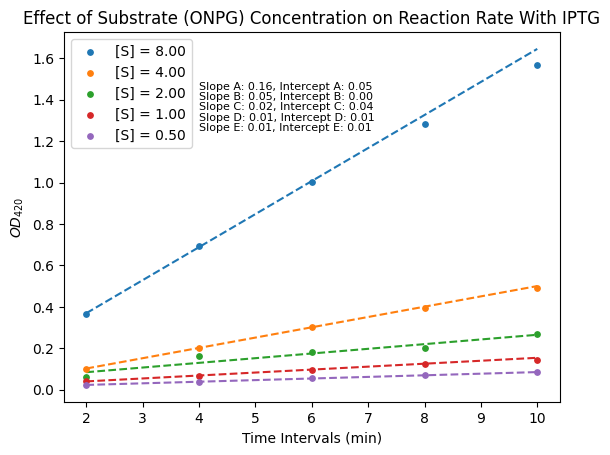

In [15]:
import numpy as np
import matplotlib.pyplot as plt

Time_intervals = np.array([2, 4, 6, 8, 10])
Tube_A_with = np.array([0.367, 0.693, 1.005, 1.282, 1.568])
Tube_B_with = np.array([0.102, 0.202, 0.301, 0.395, 0.489])
Tube_C_with = np.array([0.059, 0.163, 0.183, 0.203, 0.269 ])
Tube_D_with = np.array([0.040, 0.068, 0.097, 0.124, 0.143])
Tube_E_with = np.array([0.023, 0.038, 0.054, 0.069, 0.083])

slope_A_with, intercept_A_with = np.polyfit(Time_intervals[:3], Tube_A_with[:3], 1)
slope_B_with, intercept_B_with = np.polyfit(Time_intervals[:3], Tube_B_with[:3], 1)
slope_C_with, intercept_C_with = np.polyfit(Time_intervals[:4], Tube_C_with[:4], 1)
slope_D_with, intercept_D_with = np.polyfit(Time_intervals[:3], Tube_D_with[:3], 1)
slope_E_with, intercept_E_with = np.polyfit(Time_intervals[:3], Tube_E_with[:3], 1)

plt.scatter(Time_intervals, Tube_A_with, s=15, label='[S] = 8.00', zorder=5)
plt.scatter(Time_intervals, Tube_B_with, s=15, label='[S] = 4.00', zorder=5)
plt.scatter(Time_intervals, Tube_C_with, s=15, label='[S] = 2.00', zorder=5)
plt.scatter(Time_intervals, Tube_D_with, s=15, label='[S] = 1.00', zorder=5)
plt.scatter(Time_intervals, Tube_E_with, s=15, label='[S] = 0.50', zorder=5)

plt.plot(Time_intervals, slope_A_with * Time_intervals + intercept_A_with, linestyle='--')
plt.plot(Time_intervals, slope_B_with * Time_intervals + intercept_B_with, linestyle='--')
plt.plot(Time_intervals, slope_C_with * Time_intervals + intercept_C_with, linestyle='--')
plt.plot(Time_intervals, slope_D_with * Time_intervals + intercept_D_with, linestyle='--')
plt.plot(Time_intervals, slope_E_with * Time_intervals + intercept_E_with, linestyle='--')

plt.text(4, 1.45, f'Slope A: {slope_A_with:.2f}, Intercept A: {intercept_A_with:.2f}', fontsize=8, ha='left')
plt.text(4, 1.40, f'Slope B: {slope_B_with:.2f}, Intercept B: {intercept_B_with:.2f}', fontsize=8, ha='left')
plt.text(4, 1.35, f'Slope C: {slope_C_with:.2f}, Intercept C: {intercept_C_with:.2f}', fontsize=8, ha='left')
plt.text(4, 1.30, f'Slope D: {slope_D_with:.2f}, Intercept D: {intercept_D_with:.2f}', fontsize=8, ha='left')
plt.text(4, 1.25, f'Slope E: {slope_E_with:.2f}, Intercept E: {intercept_E_with:.2f}', fontsize=8, ha='left')

plt.legend()
plt.xlabel('Time Intervals (min)')
plt.ylabel('$OD_{420}$')
plt.title('Effect of Substrate (ONPG) Concentration on Reaction Rate With IPTG')

plt.show()


In [16]:
import numpy as np
import matplotlib.pyplot as plt

epsilon = slope

OD_min = list([slope_A, slope_B, slope_C, slope_D, slope_E])
OD_min_with = list([slope_A_with, slope_B_with, slope_C_with, slope_D_with, slope_E_with])

# V0 and V0_with's unit: mM/min
V0 = OD_min / epsilon
V0_with = OD_min_with / epsilon

inverse_V0 =  1/V0
inverse_V0_with = 1/V0_with

# Unit: mM
V_s = np.array([8.0, 4.0, 2.0, 1.0, 0.5])
S = ((V_s * 3.3) / 12)
inverse_S = 1/S

In [21]:
print(f'Reaction velocities V_0 without IPTG: {V0}')
print(f'Reaction velocities V_0 with IPTG: {V0_with}')
print(f'1/V_0 values without IPTG are: {inverse_V0}')
print(f'1/V_0 values with IPTG are: {inverse_V0_with}')
print(f'1/[S] values are: {inverse_S}')
print(f'Extinction coefficient: {epsilon}')

Reaction velocities V_0 without IPTG: [0.03039885 0.03019551 0.02511209 0.01636861 0.00986183]
Reaction velocities V_0 with IPTG: [0.03243221 0.010116   0.00459541 0.00289755 0.00157586]
1/V_0 values without IPTG are: [ 32.89598515  33.11750694  39.82145571  61.09254385 101.40102639]
1/V_0 values with IPTG are: [ 30.83354094  98.85326191 217.60839734 345.1192828  634.57416516]
1/[S] values are: [0.45454545 0.90909091 1.81818182 3.63636364 7.27272727]
Extinction coefficient: 4.91794977996376


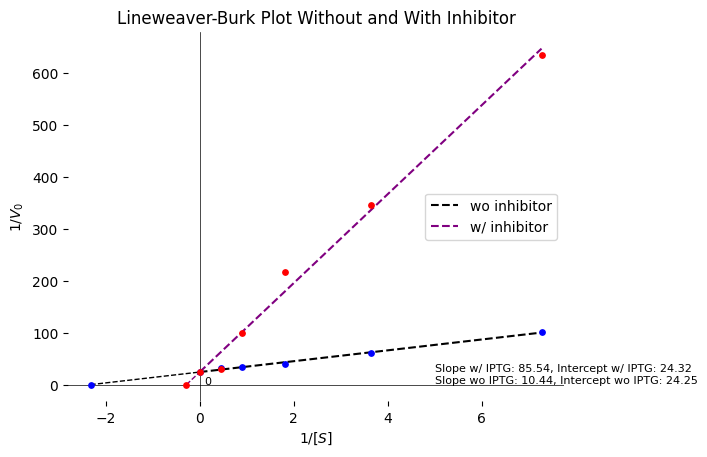

In [22]:
slope_wo_IPTG, intercept_wo_IPTG = np.polyfit(inverse_S, inverse_V0, 1)
slope_w_IPTG, intercept_w_IPTG = np.polyfit(inverse_S, inverse_V0_with, 1)

x_intercept_wo_IPTG = -intercept_wo_IPTG / slope_wo_IPTG
y_intercept_wo_IPTG = intercept_wo_IPTG
x_intercept_w_IPTG = -intercept_w_IPTG / slope_w_IPTG
y_intercept_w_IPTG = intercept_w_IPTG

x_extension_wo_IPTG = np.array([x_intercept_wo_IPTG, 0])
y_extension_wo_IPTG = np.array([0, intercept_wo_IPTG])
x_extension_w_IPTG = np.array([x_intercept_w_IPTG, 0])
y_extension_w_IPTG = np.array([0, intercept_w_IPTG])

plt.scatter(inverse_S, inverse_V0, s=15, zorder=5, color = 'blue')
plt.scatter(inverse_S, inverse_V0_with, s=15, zorder=5, color = 'red')

plt.plot(np.insert(inverse_S, 0, 0), slope_wo_IPTG * np.insert(inverse_S, 0, 0) + intercept_wo_IPTG, 
         linestyle='--', label = 'wo inhibitor', color = 'black')
plt.plot(np.insert(inverse_S, 0, 0), slope_w_IPTG * np.insert(inverse_S, 0, 0) + intercept_w_IPTG, 
         linestyle='--', label = 'w/ inhibitor', color = 'purple')

# plt.xlim(0, 0.01)
# plt.ylim(-0.05, 0.2)

# Hide tick marks and labels on axes
# plt.xticks([])
# plt.yticks([])

# Draw x-y axis lines
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Add index labels for axes
plt.text(0.1, -0.02, '0', fontsize=8)

# Remove border
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Plot extension of regression line with another color
plt.plot(x_extension_wo_IPTG, y_extension_wo_IPTG, color='black', linestyle='--', linewidth=1)
plt.plot(x_extension_w_IPTG, y_extension_w_IPTG, color='purple', linestyle='--', linewidth=1)


plt.text(5, 2, f'Slope wo IPTG: {slope_wo_IPTG:.2f}, Intercept wo IPTG: {intercept_wo_IPTG:.2f}', fontsize=8, ha='left')
plt.text(5, 25, f'Slope w/ IPTG: {slope_w_IPTG:.2f}, Intercept w/ IPTG: {intercept_w_IPTG:.2f}', fontsize=8, ha='left')

plt.scatter(x_intercept_wo_IPTG, 0, color='blue', zorder=5, s = 15)
plt.scatter(0, y_intercept_wo_IPTG, color='blue', zorder=5, s = 15)
plt.scatter(x_intercept_w_IPTG, 0, color='red', zorder=5, s = 15)
plt.scatter(0, y_intercept_w_IPTG, color='red', zorder=5, s = 15)

# plt.annotate(f'({x_intercept_wo_IPTG:.2f}, 0)', (x_intercept_wo_IPTG, 0), xytext=(10, -20),
#              textcoords='offset points', arrowprops=dict(arrowstyle="->"))
# plt.annotate(f'(0, {y_intercept_wo_IPTG:.2f})', (0, y_intercept_wo_IPTG), xytext=(-30, 10),
#              textcoords='offset points', arrowprops=dict(arrowstyle="->"))
# plt.annotate(f'({x_intercept_w_IPTG:.2f}, 0)', (x_intercept_wo_IPTG, 0), xytext=(10, -20),
#              textcoords='offset points', arrowprops=dict(arrowstyle="->"))
# plt.annotate(f'(0, {y_intercept_w_IPTG:.2f})', (0, y_intercept_wo_IPTG), xytext=(-30, 10),
#              textcoords='offset points', arrowprops=dict(arrowstyle="->"))

plt.legend()
plt.xlabel('$1/[S]$')
plt.ylabel('$1/V_0$')
plt.title('Lineweaver-Burk Plot Without and With Inhibitor')

plt.show()

In [23]:
k_m = 1/x_intercept_wo_IPTG
k_app = 1/x_intercept_w_IPTG
C_I = (5.5 * 1) / 12
k_i = (1 / ((k_app / k_m) - 1)) * C_I

print('V_max without IPTG: ', 1/y_intercept_wo_IPTG)
print('V_max with IPTG: ', 1/y_intercept_w_IPTG)
print('K_m: ', slope_wo_IPTG / intercept_wo_IPTG)
print('K_app: ', slope_w_IPTG / intercept_w_IPTG)
print('Inhibitor concentration [I]: ', C_I)
print('K_i: ', k_i)

V_max without IPTG:  0.041234272100093894
V_max with IPTG:  0.04111274588938404
K_m:  0.430371886283266
K_app:  3.5168878579743277
Inhibitor concentration [I]:  0.4583333333333333
K_i:  0.06390823278490627
